In [1]:
#name: Tyler Stowell, Adam Hayes
# section: 104
# Homework name: Data Visualization Project - Baseball
# Description: This project takes information on baseball players and their stats from the .csv file
# and makes graphs of their data based on what the user askes the program to do.

In [2]:
%matplotlib inline


import matplotlib.pyplot as plt
import statistics

# You may add more imports as needed

# You must use this object to index into columns
class BattingData:
    year = 0
    player_id = 1
    first_name = 2
    last_name = 3
    team_name = 4
    games = 5
    at_bats = 6
    runs = 7
    hits = 8
    doubles = 9
    triples = 10
    home_runs = 11
    rbi = 12
    walks = 13
    hbp = 14
    stolen_bases = 15
    caught_stealing = 16
    strike_outs = 17
    sac_flies = 18
    position = 19

Baseball Data Visualization Project
=============

Add more cells as needed! Make sure that your notebook runs without errors before turning it in for each checkpoint!

In [3]:
# This function opens our batting data file and reads through all the lines
# It then turns each row into a list and then creates columns from the row list indices
# The function changes empty spaces into 0's and numbers into ints and leaves words as strings
# It then returns a new list of lists containing all the data from our file
def read_data():
    f = open("battingData1950Present.csv","r")
    header = f.readline()
    ls = [] # column
    for line in f:
        split = line.strip().split(",") # rows
        for i in range(len(split)):
            if split[i] == "":
                split[i] = 0
            elif split[i].isnumeric():
                split[i] = int(split[i])
        ls.append(split)
    f.close()
    return ls

In [4]:
# This function takes our list of lists, an index column, and a target value as parameters
# It then finds all the similar target values in that column and returns the full row for each
# integer = battingData.statistic
# target = year
# makes list of the statistic from all the same years
def get_matching_rows(ls, integer, target):
    ls_matching = []
    for i in ls:
        if i[integer] == target:
            ls_matching.append(i)
    return ls_matching
    

In [5]:
# This function takes our list of lists and an index column as parameters
# It then returns all the values in the specified column
# takes all the desired stats from a previous list of lists
def get_column_values(ls, index):
    ls_column = []
    for i in range(len(ls)):
        ls_column.append(ls[i][index])
    return ls_column

In [6]:
# This function takes our list of lists as a parameter and identifies all the unique values in the
# original list and returns them
# makes a list of desired data and excludes repeats
def get_unique_values(ls):
    ls_unique = []
    for i in ls:
        if i in ls_unique:
            ls_unique.append(i)
    return ls_unique
# works well

In [7]:
# This function takes our list of lists and a specific column as parameters and identifies all the 
# unique values in from the row of the target value and puts them in a new list
def get_unique_column_values(ls, column):
    ls_unique_values = []
    for i in ls:
        if i[column] not in ls_unique_values:
            ls_unique_values.append(i[column])
    return ls_unique_values
# don't use for the graphs

In [8]:
# This function takes 2 parameters, our list of lists from read_data(), and a target year and creates a new list of 
# lists with all of the rows from the same year
# It then calculates the total number of runs scored by each player in that year and graphs it
# The function plots total number of runs on the x axis and number of players that scored the same amount of runs on
# the y axis
# The graph is a histogram
def total_runs(ls,target):
    #get all unique player ids

    ls2 = get_matching_rows(ls, BattingData.year, target)
    ids = get_unique_column_values(ls2, BattingData.player_id)
    runs = []
    for players in ids:
        #Get all rows for that player id
        p = get_matching_rows(ls2, BattingData.player_id, players)
        #get runs from above rows
        r = sum(get_column_values(p, BattingData.runs))
        runs.append(r)

    plt.hist(runs, bins= 100) # making a histogram 
    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
    plt.xlabel("Number of total runs") 
    plt.ylabel("Number of players") 
    plt.title('Total runs vs. number of players having that many runs '+ "("+str(target)+ ")")
    plt.savefig("baseball_runs.png", bbox_inches='tight')
    plt.show()

In [9]:
# This function takes the same parameters as the last one and graphs a histogram with the same x and y values as the 
# previous function
# The function also divides up the number of players that scored the same amount of runs in a given year by position
# It creates a list for each different positions and then appends those list into a master list

def total_runs_position(ls, target):
    
    #cutoff = int(input("What do you want your cutoff to be? "))
    ls2 = get_matching_rows(ls, BattingData.year, target)
    ids2 = get_unique_column_values(ls2,BattingData.player_id)
    short_stop_run = []
    first_base_run = []
    second_base_run = []
    third_base_run = []
    catcher_run = []
    pitcher_run = []
    out_fielder_run = []
    null_position_run = []
    full_list = []
    
    for i in ids2:
        player = get_matching_rows(ls2, BattingData.player_id,i)
        total = sum(get_column_values(ls,BattingData.runs))
        for p in player:
            if p[BattingData.position] == "SS":
                short_stop_run.append(p[BattingData.runs])
            elif p[BattingData.position] == "1B":
                first_base_run.append(p[BattingData.runs])
            elif p[BattingData.position] == "2B":
                second_base_run.append(p[BattingData.runs])
            elif p[BattingData.position] == "3B":
                third_base_run.append(p[BattingData.runs])
            elif p[BattingData.position] == "P":
                pitcher_run.append(p[BattingData.runs])
            elif p[BattingData.position] == "C":
                catcher_run.append(p[BattingData.runs])
            elif p[BattingData.position] == "OF":
                out_fielder_run.append(p[BattingData.runs])
            else:
                null_position_run.append(p[BattingData.runs])
    full_list.append(short_stop_run)
    full_list.append(first_base_run)
    full_list.append(second_base_run)
    full_list.append(third_base_run)
    full_list.append(pitcher_run)
    full_list.append(catcher_run)
    full_list.append(out_fielder_run)
    full_list.append(null_position_run)
#     plt.hist(full_list, bins=100,stacked=True, label = ["SS", "1B", "2B", "3B", "C", "P", "OF", "NULL"])
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
#     plt.xlabel("Number of total runs") 
#     plt.ylabel("Number of players") 
#     plt.title('Total runs vs. number of players having that many runs '+ "("+str(target)+ ")")
#     plt.show()


#     colors = ['b','c','g','r','m','y','k','w']
    plt.hist(full_list, bins= 100, stacked = True, label = ["SS","1B","2B","3B","C","P","OF","NULL"] ) # making a histogram 
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
    plt.xlabel("Number of total runs") 
    plt.ylabel("Number of players") 
    plt.title('Total runs vs. number of players having that many runs '+ "("+str(target)+ ")")
    plt.savefig("baseball_runs.png", bbox_inches='tight')
    plt.show()


In [10]:
# This function takes 3 parameters, our baseball data, a user inputed target year, and a user inputed cutoff value
# This function creates the same graph as the total_runs function but with a cutoff value
def total_runs_cut_off(ls,target,cutoff):
    #get all unique player ids
    
    ls2 = get_matching_rows(ls, BattingData.year, target)
    ids = get_unique_column_values(ls2, BattingData.player_id)
    runs = []
    for players in ids:
        #Get all rows for that player id
        p = get_matching_rows(ls2, BattingData.player_id, players)
        #get runs from above rows
        r = sum(get_column_values(p, BattingData.runs))
        if r >= cutoff:
            runs.append(r)

    plt.hist(runs, bins= 100) # making a histogram 
    plt.xlabel("Number of total runs") 
    plt.ylabel("Number of players") 
    plt.title('Total runs vs. number of players having that many runs '+ "("+str(target)+ ")")
    plt.savefig("baseball_runs.png", bbox_inches='tight')
    plt.show()

In [11]:
# This function takes 3 parameters, our baseball data, a user inputed target year, and a user inputed cutoff value
# This function creates the same graph as the the total runs position function but uses a user's input
# for the cut off number they want and graphs it as a histogram
def histogram_positions_cutoff(ls,target,cutoff):
    
    ls2 = get_matching_rows(ls, BattingData.year, target)
    ids2 = get_unique_column_values(ls2,BattingData.player_id)
    short_stop_run = []
    first_base_run = []
    second_base_run = []
    third_base_run = []
    catcher_run = []
    pitcher_run = []
    out_fielder_run = []
    null_position_run = []
    full_list = []
    
    for i in ids2:
        player_name = get_matching_rows(ls2, BattingData.player_id,i)
        total = sum(get_column_values(player_name,BattingData.runs))
        if cutoff <= total:
            for p in player_name:
                if p[BattingData.position] == "SS":
                    short_stop_run.append(p[BattingData.runs])
                elif p[BattingData.position] == "1B":
                    first_base_run.append(p[BattingData.runs])
                elif p[BattingData.position] == "2B":
                    second_base_run.append(p[BattingData.runs])
                elif p[BattingData.position] == "3B":
                    third_base_run.append(p[BattingData.runs])
                elif p[BattingData.position] == "P":
                    pitcher_run.append(p[BattingData.runs])
                elif p[BattingData.position] == "C":
                    catcher_run.append(p[BattingData.runs])
                elif p[BattingData.position] == "OF":
                    out_fielder_run.append(p[BattingData.runs])
                else:
                    null_position_run.append(p[BattingData.runs])
    #if total >= cutoff:
    full_list.append(short_stop_run)
    full_list.append(first_base_run)
    full_list.append(second_base_run)
    full_list.append(third_base_run)
    full_list.append(pitcher_run)
    full_list.append(catcher_run)
    full_list.append(out_fielder_run)
    full_list.append(null_position_run)
    
    plt.hist(full_list, bins=100,stacked=True, label = ["SS", "1B", "2B", "3B", "C", "P", "OF", "NULL"])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
    plt.xlabel("Number of total runs") 
    plt.ylabel("Number of players") 
    plt.title('Total runs vs. number of players having that many runs '+ "("+str(target)+ ")")
    plt.show()

In [12]:
# This function prints out the options the user can choose from and prompts them to pick one
# It then returns the users choice as an int
def get_menu_choice():
    print("1: Runs scored in a given year for all players (no cutoff) ")
    print("2: Runs scored in a given year for all players (with cutoff) ")
    print("3: Graph team presence over time")
    print("4: Plot homeruns over time")
    print("5: Graph max number of hits for each year")
    print("6: Number of triples vs doubles hit each year over all years")
    print("7: ")
    print("8: ")
    print(" ")
    answer = int(input("Pick an option: "))
    if answer < 1 or answer > 8:
        print("good bye.")
    return answer
    

In [13]:
# This function gets the user's answer to what option they want to use and that determins what functions to run
# and what graphs get printed.
def questions(answer):
    if answer == 1:
        target = int(input("What year? "))
        total_runs(read_data(),target)
        total_runs_position(read_data(),target)
    elif answer == 2:
        target = int(input("What year? "))
        cutoff = int(input("What do you want your cutoff to be? "))
        total_runs_cut_off(read_data(),target,cutoff)
        histogram_positions_cutoff(read_data(),target,cutoff)
    elif answer == 3:
        active_years(read_data())
    elif answer == 4:
        homeruns_over_years(read_data())
    elif answer == 5:
        max_hits(read_data())
    elif answer == 6:
        triples_vs_doubles_over_time(read_data())
        

In [14]:
# This function takes one parameter, our list of lists containing all our data
# It then produces a scatter plot representing which teams were active in what years with team names on the y axis
# and years on the x axis
def active_years(ls):
    plt.figure(figsize=(12,12))
    team_names = get_unique_column_values(ls,BattingData.team_name)
    count = 0
    for i in team_names:
        z = get_matching_rows(ls, BattingData.team_name, i)
        x = get_unique_column_values(z, BattingData.year)
        #print(i)
        ls_y_values = []
        for r in range(len(x)):
            ls_y_values.append(count)
        count += 1
        #print(ls_y_values)
        plt.scatter(x,ls_y_values, marker = "s")
        plt.yticks(range(len(team_names)),team_names)
        plt.xlabel("Years")
        
        plt.title("Team Presence by Year")
        
        
        
        
        
        

        

In [15]:
# This function takes one parameter, a list of lists containing all our baseball data
# It then calculates the max number of homeruns, the top 99% of homeruns hit, and the top 50% of homeruns hit for
# each year and graphs them on the same bar graph with a legend dilineating the different statistics
def homeruns_over_years(ls):
    years = get_unique_column_values(ls,BattingData.year)
    maxlist = []
    toplist = []
    midlist = []
    for i in years:
        unique_years = get_matching_rows(ls,BattingData.year,i)
        y = get_column_values(unique_years, BattingData.home_runs)
        max_homeruns = max(y)
        maxlist.append(max_homeruns)
        #print(y)
        y.sort()
        percentile = round(len(y)*.99)
        toplist.append(y[percentile])
        
        
        mid = round(len(y) / 2)
        midlist.append(y[mid])
    plt.bar(years,midlist, label = "50th percentile")   
    plt.bar(years,maxlist, label = "Maximum")
    plt.bar(years,toplist, label = "99th percentile")
    
    plt.legend() 
    plt.xlabel("Year") 
    plt.ylabel("Number of homeruns") 
    plt.title("Homeruns per year by player")
    plt.show()


In [16]:
# This function takes one parameter, our list of lists containing all our data
# It then calculates the max number of hits recorded for each year and then graphs it on a bar graph
def max_hits(ls):
    years = get_unique_column_values(ls, BattingData.year)
    max_hits_list = []
    for i in years:
        unique_years = get_matching_rows(ls,BattingData.year,i)
        hits = get_column_values(unique_years, BattingData.hits)
        max_hits = max(hits)
        max_hits_list.append(max_hits)
        
    plt.bar(years, max_hits_list)
    plt.xlabel("Year")
    plt.ylabel("Number of Hits")
    plt.title("Highest # of hits in MLB per year")
    plt.show()

    
        

In [17]:
# This function takes one parameter, our list of lists containing all our data
# It then calculates the total number of triples and total number of doubles hit each year and plots them both with
# a line graph to show the comparison
def triples_vs_doubles_over_time(ls):
    years = get_unique_column_values(ls,BattingData.year)
    triples_list = []
    doubles_list = []
    for i in years:
        unique = get_matching_rows(ls,BattingData.year,i)
        triples = sum(get_unique_column_values(unique,BattingData.triples))
        triples_list.append(triples)
        doubles = sum(get_unique_column_values(unique,BattingData.doubles))
        doubles_list.append(doubles)
    

    plt.plot(years,triples_list, label = "triples")
    plt.plot(years,doubles_list, label = "doubles")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
    plt.xlabel("Years") 
    plt.ylabel("Triples and Doubles") 
    plt.title("Triples vs Doubles over time")
    plt.show()


1: Runs scored in a given year for all players (no cutoff) 
2: Runs scored in a given year for all players (with cutoff) 
3: Graph team presence over time
4: Plot homeruns over time
5: Graph max number of hits for each year
6: Number of triples vs doubles hit each year over all years
7: 
8: 
 
Pick an option: 3


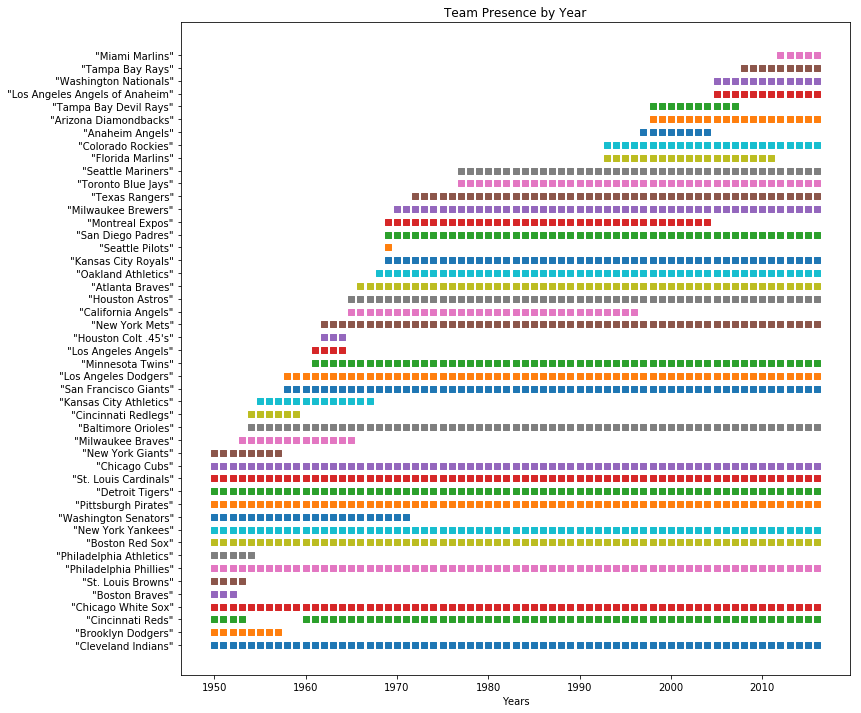

In [20]:
# This is our main function where we run all of our inital functions like the read_data function to get the information
# from the .csv list.
def main():
    read_data()
    answer = get_menu_choice()
    questions(answer)

if __name__ == "__main__":
    main()

# where to start
# where to use the utility functions
#